In [11]:
import pandas as pd
from pandas import DataFrame
import networkx as nx
import matplotlib.pyplot as plt
import collections

In [2]:
df_wiki_info = pd.read_csv('yagoWikipediaInfo_fa.tsv', sep='\t')

In [3]:
G = nx.Graph()

In [4]:
for i in range (len(df_wiki_info)):
    
    row = df_wiki_info.iloc[i, :]
    G.add_edge(row[1], row[3])
    G[row[1]][row[3]]['predicate'] = row[2]

In [5]:
#Number of edges
E = G.number_of_edges()
print('Number of edges:', E)

Number of edges: 3496397


In [6]:
#Number of nodes
V = G.number_of_nodes()
print('Number of nodes:', V)

Number of nodes: 929570


In [7]:
#Graph density
print('Graph density:', nx.classes.function.density(G))    

Graph density: 8.092580034470046e-06


In [8]:
#Average degree
avg_degree = 2*E/V
print('Average degree:', avg_degree)

Average degree: 7.522611530062287


In [ ]:
#Global clustering co-efficient
global_clustering_coefficients = nx.clustering(G)
df_gcc = DataFrame(columns={'node', 'clustering_coefficient'})
for node, cc in global_clustering_coefficients.items():
    df_gcc = df_gcc.append({'node': node, 'clustering_coefficient': cc}, ignore_index=True)

In [ ]:
#Diameter
subgraph_list = []

for conn_component in nx.connected_components(G):
    subgraph_list.append(conn_component)

print('Number of subgraphs: {}'.format(len(subgraph_list)))

for i in range (len(subgraph_list)):
    subgraph = nx.Graph()
    node_list = list(subgraph_list[i])
    for node in node_list:
        subgraph.add_edges_from(G.edges(node))
    
    print('Subgraph_{} diameter : {}'.format(i+1, nx.diameter(subgraph)))

Number of subgraphs: 43


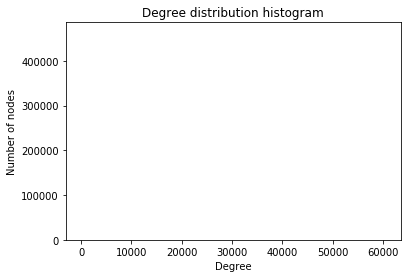

<Figure size 1080x1080 with 0 Axes>

Max degree: 60473
Counter({1: 462768, 5: 59551, 7: 58790, 6: 53329, 4: 51002, 3: 39041, 8: 31612, 9: 23869, 10: 19492, 11: 16808, 12: 12090, 2: 11073, 13: 10074, 14: 8364, 15: 6950, 16: 5781, 17: 5062, 18: 4344, 19: 3718, 20: 3237, 21: 2874, 22: 2476, 23: 2217, 24: 2030, 25: 1774, 26: 1601, 27: 1442, 28: 1298, 29: 1146, 31: 1046, 30: 1026, 32: 960, 33: 871, 34: 773, 35: 758, 36: 664, 37: 664, 38: 643, 39: 564, 40: 543, 41: 524, 42: 493, 43: 460, 44: 417, 45: 408, 47: 378, 46: 357, 48: 356, 49: 335, 51: 299, 50: 294, 55: 288, 52: 276, 54: 262, 53: 244, 57: 239, 56: 229, 58: 222, 60: 216, 61: 207, 62: 207, 59: 204, 65: 194, 63: 187, 64: 178, 69: 175, 73: 164, 66: 160, 71: 153, 70: 147, 77: 144, 72: 142, 67: 139, 68: 138, 75: 126, 85: 124, 81: 122, 79: 121, 76: 120, 78: 119, 74: 118, 80: 112, 86: 104, 83: 102, 89: 101, 84: 99, 87: 98, 91: 92, 90: 91, 88: 90, 93: 90, 82: 89, 95: 78, 100: 78, 98: 75, 97: 72, 92: 70, 94: 69, 101: 68, 106: 68, 103: 67, 111: 66, 102: 62, 104: 61, 105: 61, 110:

In [10]:
#Degree distribution
degrees = [G.degree(n) for n in G.nodes()]
degrees.sort()
degree_distribution = collections.Counter(degrees)
plt.hist(degrees, bins=max(degrees))
plt.title('Degree distribution histogram')
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.figure(figsize=(15,15))
plt.show()
print('Max degree: {}'.format(max(degrees)))
print(degree_distribution)
#for degree in degree_distribution:
#    print('{} : {}'.format(degree, degree_distribution[degree]))

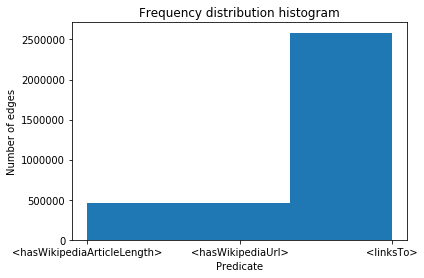

<Figure size 1080x1080 with 0 Axes>

Predicate with maximum frequency: <linksTo>
<hasWikipediaArticleLength> : 456309
<hasWikipediaUrl> : 456309
<linksTo> : 2583779


In [12]:
#Frequency distribution
predicate_list = [c for a,b,c in G.edges.data('predicate')]
freq_distribution = collections.Counter(predicate_list)
plt.hist(predicate_list, bins=len(set(predicate_list)))
plt.title('Frequency distribution histogram')
plt.xlabel('Predicate')
plt.ylabel('Number of edges')
#for index,data in enumerate(predicate_list):
#    plt.text(x=index, y =data+1, s=f'{data}', fontdict=dict(fontsize=20))
plt.figure(figsize=(15,15))
plt.show()
print('Predicate with maximum frequency: {}'.format(max(predicate_list)))
for predicate in freq_distribution:
    print('{} : {}'.format(predicate, freq_distribution[predicate]))

In [ ]:
options = {
    'node_color': 'green',
    'edge_color': 'black',
    'node_size': 10,
    'width': 0.1,
    'alpha': 1,
}
plt.figure(figsize=(10,10))
nx.draw(G, **options, with_labels=False)